# Telecom Customers Churn Study and Prediction

## Business Problem

A leading telecommunications service provider, is facing a significant challenge in retaining customers. The competitive landscape in the telecom industry has intensified, and customer churn is a growing concern. We are committed to delivering the best services and ensuring a high level of customer satisfaction. To accomplish this, we need to proactively identify potential churners and implement strategies to retain them.

Problem Statement:

The primary objective is to develop a predictive model that can accurately forecast which customers are likely to churn. Churn prediction is critical for our business as it will enable us to take proactive measures to retain customers and optimize our marketing efforts.

Specific Tasks:

1. Exploratory Data Analysis (EDA):

- Conduct a comprehensive EDA to gain insights into the dataset and understand customer behavior patterns.
- Identify key trends and correlations within the data, such as the impact of contract type, payment method, and service features on churn.
- Visualize the data to highlight important factors that influence churn.

2. Customer Segmentation:

- Utilize clustering techniques to group customers based on their behavior and characteristics.
- Explore whether distinct customer segments with varying churn tendencies exist.
- Identify common characteristics and preferences within each segment.
3. Churn Prediction Model:

- Build and train a predictive model using machine learning algorithms.
- Utilize features to predict churn.
- Evaluate the model's performance using relevant metrics.

## Dataset Description:

This dataset represents customer information from a telecommunications service provider and is designed for the analysis of customer behavior and churn prediction. It includes various attributes that describe the demographics, service usage, and subscription details of individual customers.

**Unnamed**: index or identifier for each row and may not contain meaningful information.

**customerID**: unique identifiers for each customer, which can be used to distinguish individual customers.

**gender**:  the gender of the customer, with values such as "Male" and "Female."

**SeniorCitizen**: a binary indicator (0 or 1) to identify whether the customer is a senior citizen (65 and older) or not.

**Partner**: whether the customer has a partner, with values "Yes" or "No."

**Dependents**: whether the customer has dependents, with values "Yes" or "No."

**tenure**: the number of months the customer has been with the telecommunications service.

**PhoneService**: whether the customer has phone service, with values "Yes" or "No."

**MultipleLines**: indicates if the customer has multiple lines (possibly multiple phone lines), with values such as "Yes," "No," and "No phone service."

**InternetService**: the type of internet service the customer has, such as "Fiber optic" or "No" (possibly indicating no internet service).

**DeviceProtection**: whether the customer has device protection, with values like "Yes," "No," or "No internet service."

**TechSupport**: whether the customer has tech support, with values like "Yes," "No," or "No internet service."

**StreamingTV**: indicates if the customer subscribes to streaming TV services, with values "Yes," "No," or "No internet service."

**StreamingMovies**: similar to "StreamingTV," but for streaming movies, with values "Yes," "No," or "No internet service."

**Contract**: the type of contract the customer has, such as "Month-to-month" or "Two year."

**PaperlessBilling**: whether the customer receives paperless billing, with values "Yes" or "No."

**PaymentMethod**: the payment method used by the customer, such as "Credit card (automatic)" or "Bank transfer (automatic)."

**MonthlyCharges**: the monthly charges or fees the customer incurs for the service.

**TotalCharges**: the total charges or fees accumulated by the customer, likely over the entire customer tenure.

**Churn**: A binary indicator (e.g., "Yes" or "No") showing whether the customer has churned (cancelled their subscription) or not.

### 1. Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import optuna
import warnings

In [3]:
data = pd.read_csv("telecom_users.csv")

In [93]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


I'll delete the "Unnamed: 0" column since it's not giving us any essential information for the analysis and won't be used in it.

In [4]:
data = data.drop("Unnamed: 0", axis = 1)
data = data.drop("customerID", axis = 1)

I'll also convert the "TotalCharges" column to float64 and "Senior Citizen" to object.

In [5]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce", downcast="float").fillna(0)
data["TotalCharges"] = data["TotalCharges"].astype('float64').round(2)
data["SeniorCitizen"] = data["SeniorCitizen"].astype('object')

In [9]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


### 2. EDA

#### 2.1. User Profile

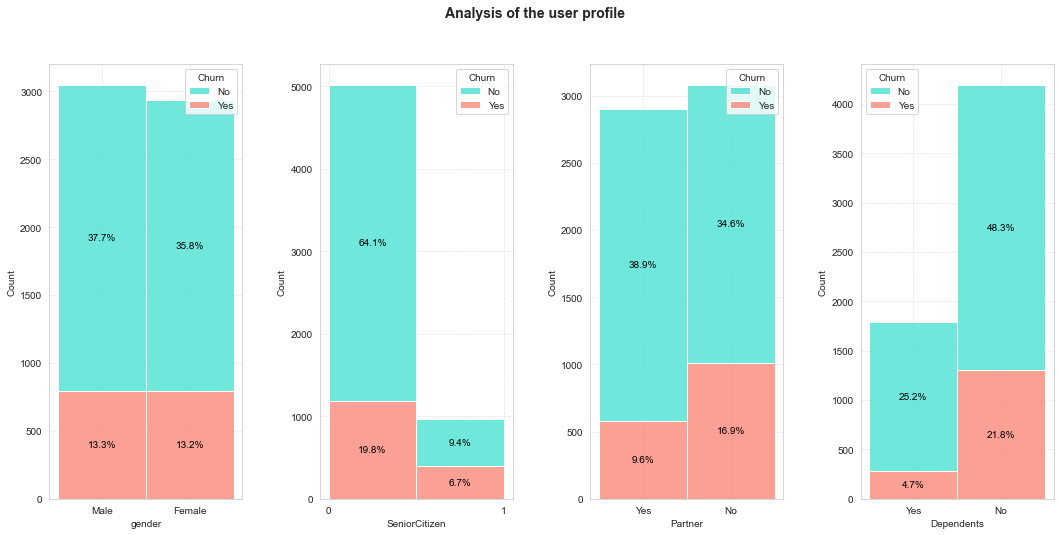

In [6]:
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': '--'})
custom_palette = ['turquoise', 'salmon']

fig, axes = plt.subplots(1, 4, figsize=(18, 8))
fig.suptitle('Analysis of the user profile',fontweight='bold', fontsize=14)

#function to add percentages inside each bar
def add_percentage_labels(axes):
    for ax in axes:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / len(data))
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() / 2  # Adjusts the vertical position to be centered within the bar
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black')

sns.histplot(ax=axes[0], data=data, x='gender', hue='Churn', palette=custom_palette, multiple="stack")
sns.histplot(ax=axes[1], data=data, x='SeniorCitizen', hue='Churn', bins=2, palette=custom_palette, multiple="stack")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])
sns.histplot(ax=axes[2], data=data, x='Partner', hue='Churn', palette=custom_palette, multiple="stack")
sns.histplot(ax=axes[3], data=data, x='Dependents', hue='Churn', palette=custom_palette, multiple="stack")


add_percentage_labels(axes)

plt.subplots_adjust(wspace=0.4)
plt.show()


The visualization of the data reveals several main findings:

1. **Gender-Based Churn**: 

Our data shows that the gender distribution among our users doesn't significantly affect churn behavior. Both male and female users exhibit similar churn rates, with approximately 13% of users from each gender category churning.

2. **Age as a Churn Factor**: 

84% of our users fall into the category of younger citizens. This group experiences a significantly higher churn rate, nearly three times more than that of senior users.

3. **Relationship Status Impact**: 

User churn does not exhibit a pronounced difference based on relationship status. Whether they have a partner or not, users tend to churn at similar rates. However, users without a partner tend to churn slightly more frequently, almost twice as often as those with partners.

4. **Dependents and Churn Behavior**: 

A majority of our users (70.1%), do not have dependents. Strikingly, this group of users experiences a remarkably higher churn rate, churning nearly five times more frequently than those with dependents.

Text(0.5, 1.0, 'Users distribution and churn by tenure')

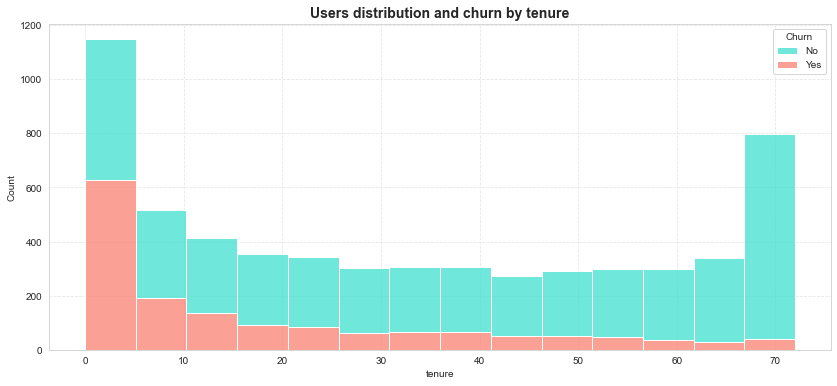

In [40]:
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='tenure', hue='Churn', bins = 14, palette=custom_palette, multiple="stack")
plt.title("Users distribution and churn by tenure", fontweight='bold', fontsize=14)

We can also note:

1. **Churn and Customer Tenure**:

A clear trend emerges when we look at the customer tenure – those who have remained with the company for less than five months are notably more likely to churn.

2. **Churn Rate Over Time**: 

Users who have been with the service for five months or more churn significantly less often. This highlights a consistent descending tendency in churn rates as customer tenure increases.

#### 2.2. Services Analysis

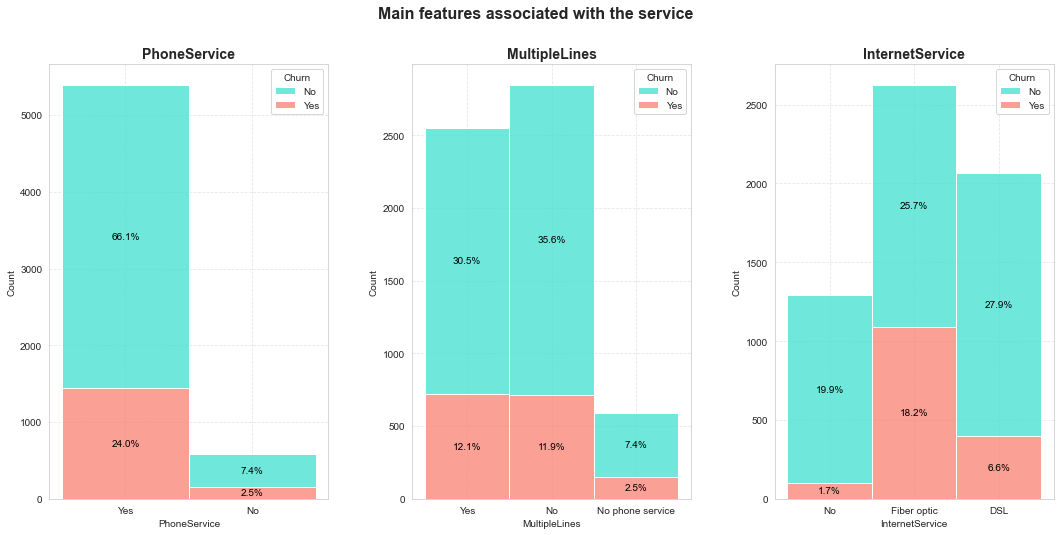

In [41]:
features = ['PhoneService','MultipleLines','InternetService']

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
plt.suptitle('Main features associated with the service', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, hue='Churn', palette=custom_palette, multiple='stack', ax=ax)
    ax.set_title(feature, fontweight='bold', fontsize=14)

    
add_percentage_labels(axes)
plt.subplots_adjust(wspace=0.3)
plt.show()

1. **Phone Service**: 

Phone service is a fundamental offering, with approximately 90% of our users subscribing to it. But anyway, churn rates for users with and without phone service are quite similar, around a quarter of the users in both cases. This suggests that the presence or absence of phone service doesn't significantly impact churn behavior.

2. **Multiple Lines**: 

This service doesn't seem to have a noticeable impact on churn. 

3. **Internet Service**: 

Around 20% of our users are not subscribed to an internet service. Among internet service users, we notice a difference in churn behavior based on the type of service chosen. Customers using fiber optic connections are more likely to churn compared to those using DSL connections. This observation could be a key factor to investigate further, as it might uncover underlying issues related to the quality or pricing of different internet service options.

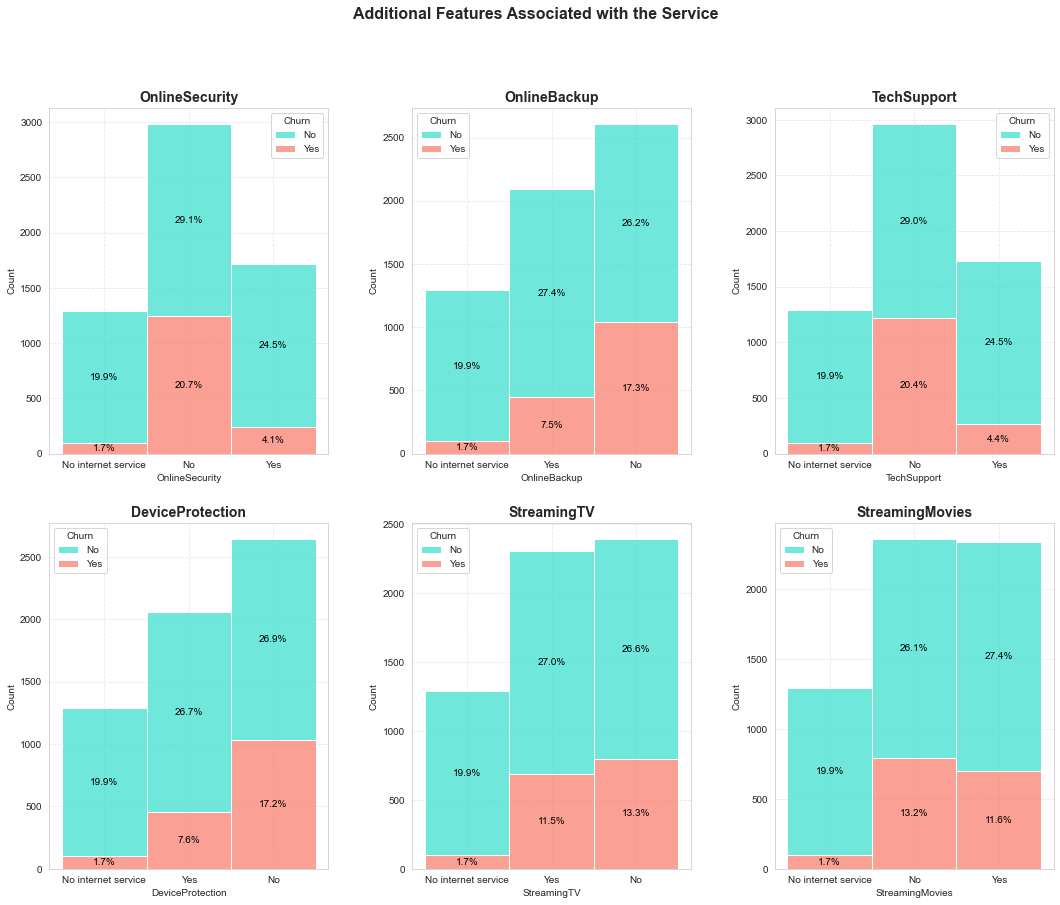

In [42]:
features = ['OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(18, 14))
plt.suptitle('Additional Features Associated with the Service', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    ax = sns.histplot(ax=axes[row, col], data=data, x=feature, hue='Churn', palette=custom_palette, multiple='stack')
    ax.set_title(feature, fontweight='bold', fontsize=14)
    
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / len(data))
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() / 2 
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black')

plt.subplots_adjust(wspace=0.3)
plt.show()

1. **Utilization of Additional Services**: 

It's notable that a significant portion of our customers, ranging from 40% to 50% depending on the specific service, do not utilize our additional offers.

2. **Churn Behavior and Service Usage**: 

It's worth noticing that those who do not take advantage of online security, online backup, device protection, and tech support are more likely to churn.

3. **Streaming Services Impact on Churn**: 

Users with subscriptions to streaming services for both TV and movies do not show a significant pattern towards churn. This implies that these services, often considered for entertainment and leisure, do not have a pronounced influence on churn behavior. Further investigation may be required.

#### 2.3. Payments Analysis

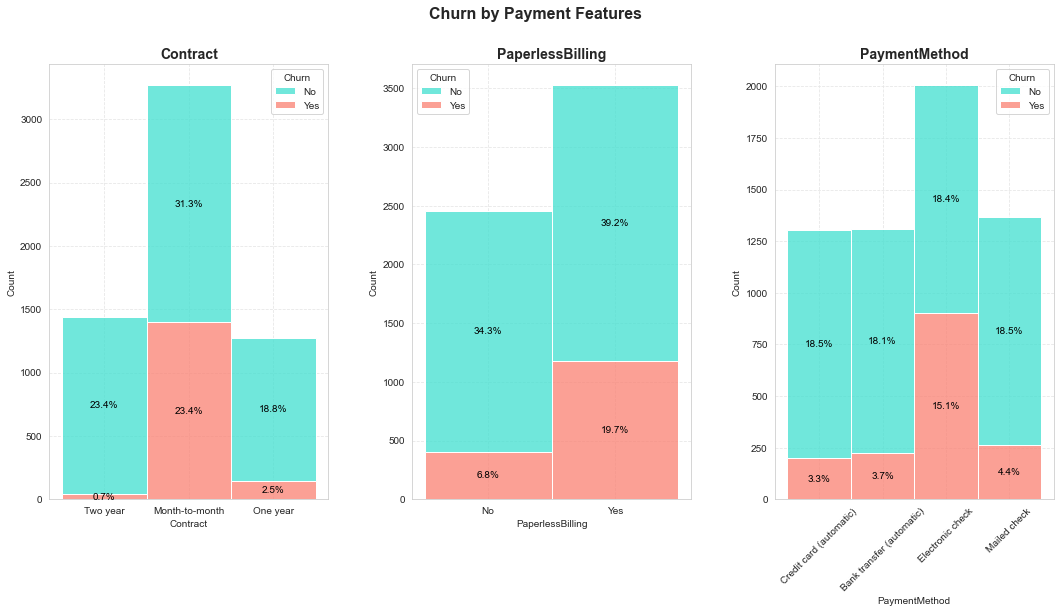

In [43]:
features = ["Contract","PaperlessBilling","PaymentMethod"]

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
plt.suptitle('Churn by Payment Features', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, hue='Churn', palette=custom_palette, multiple='stack', ax=ax)
    ax.set_title(feature, fontweight='bold', fontsize=14)
    plt.xticks(rotation=45)

    
add_percentage_labels(axes)
plt.subplots_adjust(wspace=0.3)
plt.show()

1. **Contract Analysis**:

The majority of our customers are on monthly contracts and this is also the contract type with the highest churn rate. One possible explanation for this trend is that monthly contracts offer greater flexibility and allow customers to cancel their subscriptions more easily. As a result, this ease of termination might contribute to the higher churn rate in this category.

2. **Paperless Billing**:

Customers who use paperless billing show a slightly higher churn rate compared to those who prefer traditional paper bills. This may be due to the convenience of paperless billing, which could attract more tech-savvy customers. However, the precise reasons behind this difference needs further investigation.

3. **Payment Method Insight**:

The electronic check is the most widely used payment method among our customers. However, it's concerning that this method is associated with a much higher churn rate compared to other methods. Despite its popularity (around 7% more used than other methods), the churn rate for electronic checks stands at 3 to 4 times that of other methods. This contrast raises questions about the customer experience related to electronic check payments. Further research is needed to understand and address this case.

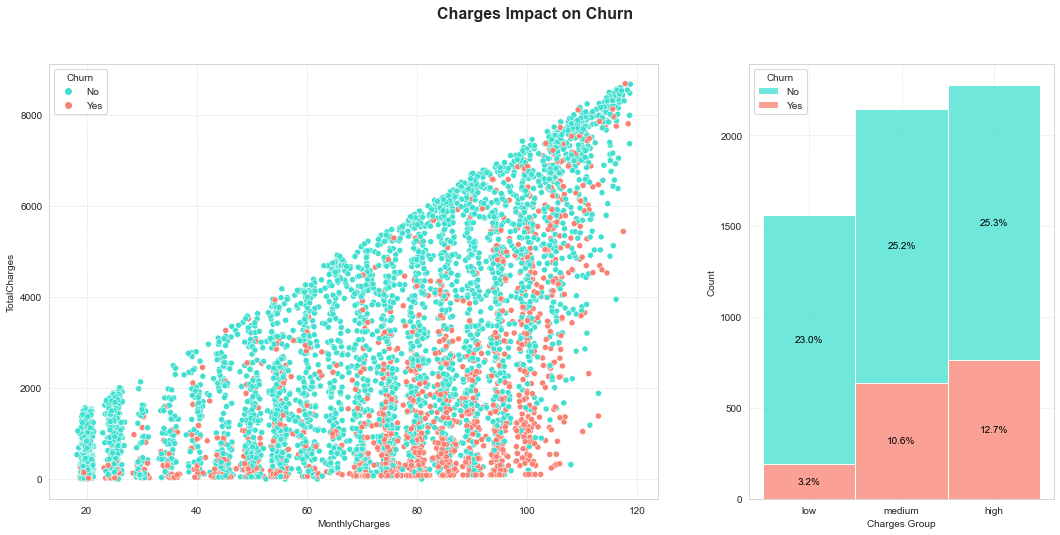

In [7]:
data["Charges Group"] = pd.cut(data["MonthlyCharges"], bins=[0, 40, 80, float('inf')], labels=["low", "medium", "high"])
fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [2, 1]})
plt.suptitle('Charges Impact on Churn', fontsize=16, fontweight='bold')

sns.scatterplot(data=data, x="MonthlyCharges", y="TotalCharges", hue="Churn",  palette=custom_palette, ax = axes[0])
sns.histplot(data=data, x="Charges Group", hue='Churn', palette=custom_palette, multiple='stack', ax = axes[1])
add_percentage_labels(axes)
plt.show()

**Charges Impact on Churn**:

By categorizing our customers into "low," "medium," and "high" charges groups based on their monthly charges, we can observe distinct patterns in relation to churn.
The data reveals that as monthly charges increase, the likelihood of churn also rises. This connection suggests that higher charges might lead to customer dissatisfaction or the pursuit of more cost-effective alternatives.
However, when we examine customers with already high total charges (indicating they've been with us for an extended period), the frequency of churn cases notably decreases. This implies that customer loyalty tends to grow with longer tenure.
Interestingly, customers in the medium (40-80 dollars per month) and high (80+ dollars per month) categories demonstrate a higher churn rate compared to those in the low charges category (up to 40$).

### 3. Cluster Analysis

In this section we'll cluster churned users to see distinct customer groups. To simplify the analysis and prepare for future steps, we'll convert certain columns to numeric values. This clustering process will help identify specific user segments, providing valuable insights for retention strategies and a deeper understanding of churn reasons.

In [8]:
data_train = data.copy()
data_train['gender'] = data_train.gender.map({'Male':1,'Female':0})
data_train['Partner'] = data_train.Partner.map({'Yes':1,'No':0})
data_train['Dependents'] = data_train.Dependents.map({'Yes':1,'No':0})
data_train['PhoneService'] = data_train.PhoneService.map({'Yes':1,'No':0})
data_train['MultipleLines'] = data_train.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
data_train['InternetService'] = data_train.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
data_train['OnlineSecurity'] = data_train.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
data_train['OnlineBackup'] = data_train.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
data_train['DeviceProtection'] = data_train.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
data_train['TechSupport'] = data_train.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
data_train['StreamingTV'] = data_train.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
data_train['StreamingMovies'] = data_train.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
data_train['PaperlessBilling'] = data_train.PaperlessBilling.map({'Yes':1,'No':0})
data_train['Churn'] = data_train.Churn.map({'Yes':1,'No':0})

data_train = pd.get_dummies(data_train, columns=["PaymentMethod"], drop_first=False)
dummy_columns = ['PaymentMethod_Bank transfer (automatic)',
                 'PaymentMethod_Credit card (automatic)',
                 'PaymentMethod_Electronic check',
                 'PaymentMethod_Mailed check']

data_train[dummy_columns] = data_train[dummy_columns].astype(int)

# Additional column
data_train['Contracted'] = data_train.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
data_train = data_train.drop("Contract", axis = 1) 
data_train = data_train.drop("Charges Group", axis = 1) 
data_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contracted
0,1,0,1,1,72,1,1,0,0,0,...,0,0,24.10,1734.65,0,0,1,0,0,1
1,0,0,0,0,44,1,0,1,0,1,...,0,1,88.15,3973.20,0,0,1,0,0,0
2,0,1,1,0,38,1,1,1,0,0,...,0,1,74.95,2869.85,1,1,0,0,0,0
3,1,0,0,0,4,1,0,1,0,0,...,1,1,55.90,238.50,0,0,0,1,0,0
4,1,0,0,0,2,1,0,1,1,0,...,0,0,53.45,119.50,0,0,0,1,0,0


 We'll use K-means cluster algorithm to see the clusters. But first Tenure and Monthly Charges columns must be normalized, since the algorithms is sensitive to the huge distances between variables.

In [9]:
data_train['Tenure_norm'] = prepro.StandardScaler().fit_transform(data_train[['tenure']])
data_train['MonthlyCharges_norm'] = prepro.StandardScaler().fit_transform(data[['MonthlyCharges']])
data_train['TotalCharges_norm'] = prepro.StandardScaler().fit_transform(data[['TotalCharges']])
data_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contracted,Tenure_norm,MonthlyCharges_norm,TotalCharges_norm
0,1,0,1,1,72,1,1,0,0,0,...,1734.65,0,0,1,0,0,1,1.612576,-1.351686,-0.246076
1,0,0,0,0,44,1,0,1,0,1,...,3973.20,0,0,1,0,0,0,0.470387,0.775360,0.738345
2,0,1,1,0,38,1,1,1,0,0,...,2869.85,1,1,0,0,0,0,0.225633,0.336999,0.253138
3,1,0,0,0,4,1,0,1,0,0,...,238.50,0,0,0,1,0,0,-1.161310,-0.295635,-0.904022
4,1,0,0,0,2,1,0,1,1,0,...,119.50,0,0,0,1,0,0,-1.242895,-0.376997,-0.956353


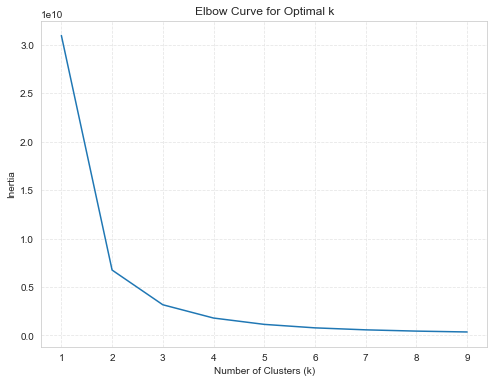

In [10]:
#Elbow curve to decide the number of clusters

inertia = []
k_range = range(1, 10)

#inertia for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.show()

We will use 3 groups according to the Elbow rule.

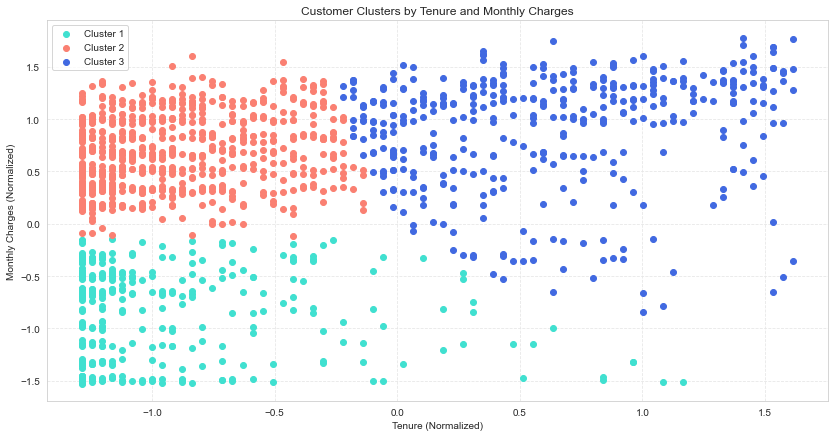

In [12]:
import os

churned_customers = data_train[data_train['Churn'] == 1]
features = churned_customers[['Tenure_norm', 'MonthlyCharges_norm']]
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_train.loc[data_train['Churn'] == 1, 'Cluster'] = kmeans.fit_predict(features)
custom_palette2 = ['turquoise', 'salmon', 'royalblue']

plt.figure(figsize=(14, 7))
for i in range(num_clusters):
    cluster_data = data_train[data_train['Cluster'] == i]
    plt.scatter(
        cluster_data['Tenure_norm'],
        cluster_data['MonthlyCharges_norm'],
        label=f'Cluster {i + 1}',
        color=custom_palette2[i]
    )

plt.title('Customer Clusters by Tenure and Monthly Charges')
plt.xlabel('Tenure (Normalized)')
plt.ylabel('Monthly Charges (Normalized)')
plt.legend()
plt.show()
warnings.filterwarnings("ignore")

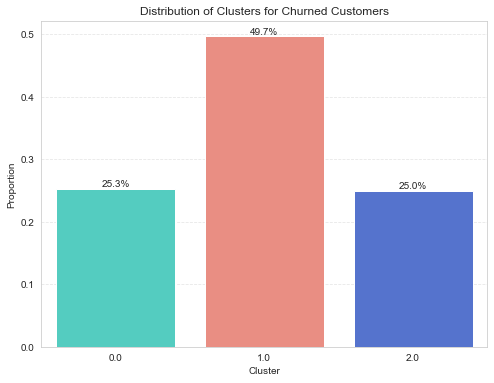

In [13]:
#distribution for churned customers
churn_distribution = churned_customers['Cluster'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_distribution.index, y=churn_distribution, palette=custom_palette2)

plt.title('Distribution of Clusters for Churned Customers')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

#percentages
for i, v in enumerate(churn_distribution):
    ax.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')

plt.show()

So looking at the cluster plots, we can see 3 different groups of customers:
1. Low Tenure and Low Monthly Charges (Aquamarine cluster)
2. Low Tenure and High Monthly Charges (Red cluster)
3. High Tenure and High Monthly Charges (Blue cluster)

Interesting that asmost 50% of our users belong to the cluster of low tenure and high charges.


**Customer Segmentation and Personalization**:

1. **Age-Based Segmentation**:
Create age-specific offerings or promotions to address the needs and preferences of both younger and senior customers.
2. **Dependents and Family Packages**:
Develop family-centric packages and incentives for users without dependents to encourage retention.
3. **Customer Clustering**:
Recognize distinct customer clusters and tailor strategies to each:

- *Engagement and Conversion* (Aquamarine Cluster):
Implement personalized onboarding and upsell strategies.

- *High Churn Risk* (Red Cluster):
Employ targeted retention efforts and loyalty programs.

- *Loyal Customers* (Blue Cluster):
Focus on upselling and recognition of long-term loyal users.

**Service Enhancement and Expansion**:

1. **Internet Service Optimization**:
Investigate and enhance the quality and pricing of different internet service options, especially addressing the higher churn rate among fiber optic users.
2. **Additional Service Promotion**:
Engage in targeted marketing campaigns to educate and encourage customers to explore and utilize additional services like online security, online backup, device protection, and tech support.
3. **Flexible Pricing Options**:
Offer pricing flexibility for customers, especially in the medium and high charge categories, to address potential dissatisfaction.


**Contract and Billing Management**:

1. **Contract Strategies**:
Consider offering multi-month contracts to incentivize longer subscriptions while retaining the flexibility of monthly contracts.
2. **Paperless Billing Experience**:
Investigate the reasons behind slightly higher churn among paperless billing users, address any user experience issues, and enhance convenience.
3. **Payment Method Improvement**:
Focus on improving the customer experience associated with electronic check payments. Investigate reasons behind the high churn rate and aim to provide a smoother payment process.

**Service Quality and User Experience**:

1. **Phone Service Quality**:
Focus on improving the quality of phone service while maintaining cost competitiveness.
2. **User Education and Engagement**:
Develop strategies to educate and engage customers in using additional services, online security, online backup, device protection, and tech support.
3. **Streaming Service Consideration**:
Recognize that streaming services don't significantly affect churn. Consider them as entertainment features rather than major drivers of customer retention or attrition.

### 4. Churn Prediction Model

Now I will create a churn prediction model that will help to identify which customers are more likely to churn, enabling proactive retention strategies and targeted interventions.
I will use 3 different models and compare their results to pick the best suitable for us:
1. Logistic Regression
2. Random Forest
3. Gradient Boost

In [14]:
data_model = data_train.copy()
data_model = data_model.drop(["MonthlyCharges", "TotalCharges", "Cluster", "tenure"], axis=1) #we are leaving only normalized copies of these columns
#data_model = pd.get_dummies(data_model, columns=["SeniorCitizen"], drop_first=False)
data_model["SeniorCitizen"] = data_model["SeniorCitizen"].astype(int)

data_model

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contracted,Tenure_norm,MonthlyCharges_norm,TotalCharges_norm
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,1.612576,-1.351686,-0.246076
1,0,0,0,0,1,0,1,0,1,1,...,1,0,0,1,0,0,0,0.470387,0.775360,0.738345
2,0,1,1,0,1,1,1,0,0,0,...,1,1,1,0,0,0,0,0.225633,0.336999,0.253138
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,-1.161310,-0.295635,-0.904022
4,1,0,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,-1.242895,-0.376997,-0.956353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,0,-1.283688,1.002843,-0.967127
5982,0,0,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,-0.386254,0.873327,-0.042182
5983,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,-0.834971,-1.449653,-0.874316
5984,1,1,0,0,1,1,1,0,0,1,...,1,1,0,0,1,0,0,-0.834971,1.150623,-0.481128


Since there is a strong imbalance in our dataset  (only 25% of the entries represent the churned class, this can affect our model in a negative way), I will try to upsample it using SMOTE to make the distribution equal so there won't be an underrepresented class.

In [15]:
X = data_model.drop("Churn", axis=1)
y = data_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
smote = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

print("Original train shape, ", X_train.shape)
print("Resample train shape, ", X_train_smote.shape)
y_train_smote.value_counts()


Original train shape,  (4489, 22)
Resample train shape,  (6574, 22)


Churn
0    3287
1    3287
Name: count, dtype: int64

#### 4.1. Hyperparameter Tuning

In [17]:
models_names = ["Logistic Regression","Random Forest", "XGBClassifier", "KNeighbors", "Decision Tree", "Gradient Boosting Classifier"]
scoreMatrix = ['accuracy','precision','recall','f1'] #'neg_log_loss' was also here

# defining models
LR = LogisticRegression(random_state=42)
RF = RandomForestClassifier(random_state=42)
XGB = XGBClassifier(random_state=42)
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier(random_state=42)
GBC = GradientBoostingClassifier(random_state=42)

#defining parameters for grid search
params = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 200], 'model__penalty': ['l1', 'l2', 'None', 'elasticnet']},
    
    'Random Forest': {'model__max_depth': [3, 5, 10, 15],
                      'model__n_estimators': [50, 100, 150, 200],
                      'model__min_samples_leaf': [1, 2, 5, 10],
                      'model__min_samples_split': [2, 3, 4, 5],
                      'model__max_features': ['sqrt', 'log2', 'None']},
    
    'XGBClassifier': {'model__learning_rate': [0.01, 0.1, 0.2],
                      'model__max_depth': [3, 5, 10, 15],
                      'model__colsample_bytree': [0.1, 1],
                      'model__colsample_bylevel': [0.1, 1],
                      'model__gamma': [0, 1],
                      'model__lambda': [0, 1],
                      'model__min_child_weight': [1, 2, 3, 5],
                      'model__max_delta_step': [0, 1, 2, 5],
                      'model__subsample': [0.1, 0.5, 1]},
    
    'KNeighbors': {'model__n_neighbors': [3, 5, 7, 9, 11],
                             'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                             'model__leaf_size': [10, 20, 30, 40, 50],
                             'model__p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
                             'model__metric': ['minkowski', 'chebyshev']},
    
    'Decision Tree': {'model__max_depth': [2, 3, 5, 10, 15], 'model__min_samples_split': [2, 3, 5, 10]},
    
    'Gradient Boosting Classifier': {'model__learning_rate': [0.01, 0.1, 0.2], 
                                     'model__n_estimators': [50, 100, 150, 200],
                                     'model__max_depth': [3, 5, 10, 15], 
                                     'model__subsample': [0.1, 0.5, 1.0],
                                     'model__min_samples_split': [2, 3, 4, 5],
                                     'model__min_samples_leaf': [1, 2, 5, 10]
                                    }
}

#pipeline with the model and grid search

def create_pipeline(model, param_grid, scorer):
    pipeline = Pipeline([
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=10, n_jobs=-1, verbose=1)
    return grid_search

def cus_log_loss(y_true, y_pred_proba):
    epsilon = 1e-15
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    log_loss = - np.mean(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))
    return log_loss


In [18]:
#pipelines for each model
pipelines = {}
for model_name, model in zip(models_names, [LR, RF, XGB, KNN, DT, GBC]):
    print(f"Running pipeline for {model_name}")
    scorer = make_scorer(cus_log_loss, greater_is_better=False)
    grid_search = create_pipeline(model, params[model_name], scorer)
    grid_search.fit(X_train_smote, y_train_smote)
    
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Save the pipeline
    pipelines[model_name] = grid_search

Running pipeline for Logistic Regression
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'model__C': 50, 'model__penalty': 'l2'}
Running pipeline for Random Forest
Fitting 10 folds for each of 768 candidates, totalling 7680 fits
Best parameters: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__n_estimators': 100}
Running pipeline for XGBClassifier
Fitting 10 folds for each of 9216 candidates, totalling 92160 fits
Best parameters: {'model__colsample_bylevel': 0.1, 'model__colsample_bytree': 1, 'model__gamma': 0, 'model__lambda': 0, 'model__learning_rate': 0.1, 'model__max_delta_step': 5, 'model__max_depth': 15, 'model__min_child_weight': 1, 'model__subsample': 1}
Running pipeline for KNeighbors
Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best parameters: {'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__metric': 'minkowski', 'model__n_neighbors': 3

#### 4.2. Getting Feature Importances

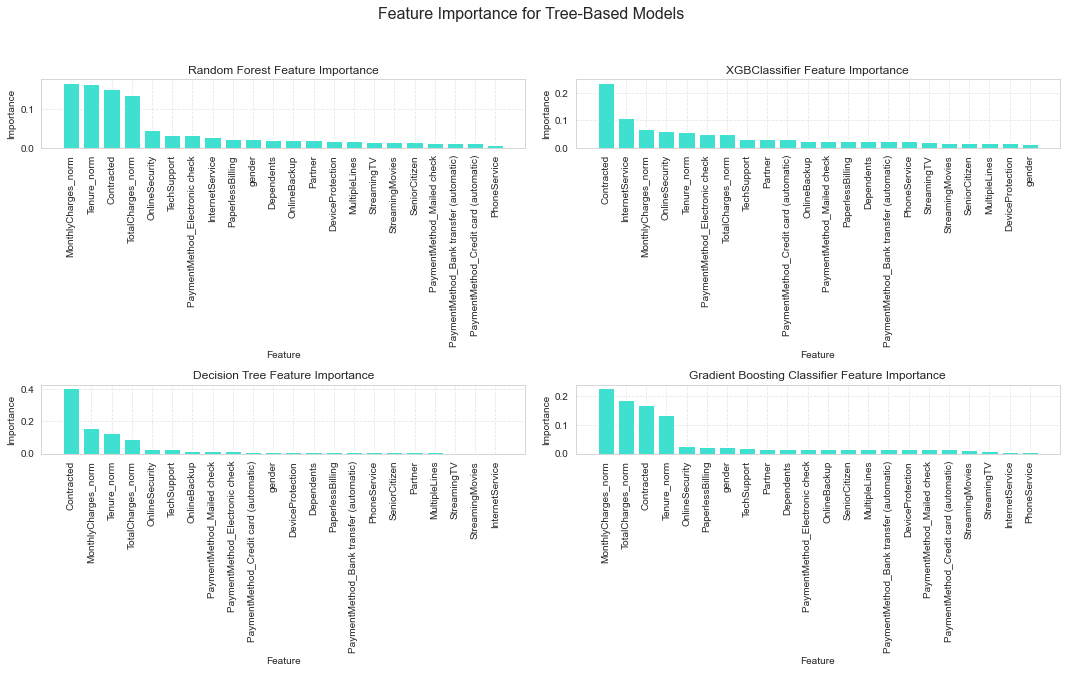

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Feature Importance for Tree-Based Models', fontsize=16)
include_models = ["Random Forest", "XGBClassifier", "Decision Tree", "Gradient Boosting Classifier"]

# loop through each model and plot feature importance
for i, (model_name, pipeline) in enumerate(pipelines.items()):
    if model_name not in include_models:
        continue  # Skip non-tree models
    
    row, col = divmod(include_models.index(model_name), 2)
    ax = axes[row, col]

    # extract the best model
    best_model = pipeline.best_estimator_.named_steps['model']

    if hasattr(best_model, 'feature_importances_'):
        # for models with feature_importances_ attribute
        feature_importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X_train_smote.columns,
            'Importance': feature_importances
        })
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Plot the feature importance
        ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='turquoise')
        ax.set_xticklabels(feature_importance_df['Feature'], rotation=90)
        ax.set_xlabel('Feature')
        ax.set_ylabel('Importance')
        ax.set_title(f'{model_name} Feature Importance')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

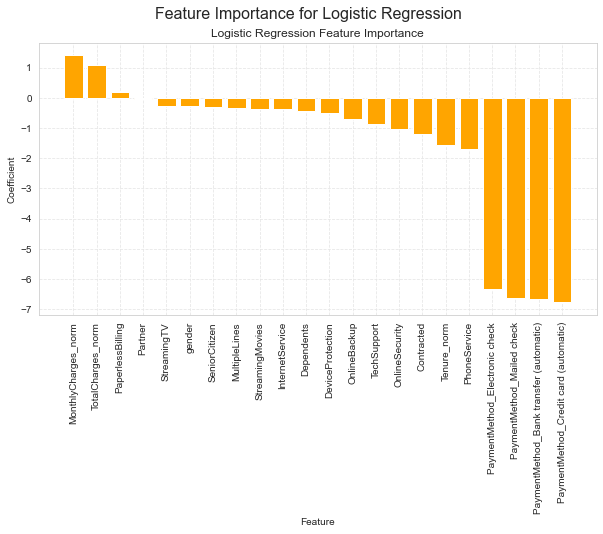

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Feature Importance for Logistic Regression', fontsize=16)

# the best model from the pipeline
best_model = pipelines["Logistic Regression"].best_estimator_.named_steps['model']

# show coefficients
coefficients = best_model.coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Coefficient': coefficients
})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# plot the coefficients
ax.bar(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='orange')
ax.set_xticklabels(feature_importance_df['Feature'], rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Coefficient')
ax.set_title('Logistic Regression Feature Importance')
plt.show()

In [31]:
LR_features = [["MonthlyCharges_norm"], ["TotalCharges_norm"], ["OnlineBackup"], ["TechSupport"], 
               ["OnlineSecurity"], ["Contracted"], ["Tenure_norm"], ["PhoneService"], ["SeniorCitizen"], 
             ["PaymentMethod_Bank transfer (automatic)"], ["PaymentMethod_Credit card (automatic)"], 
               ["PaymentMethod_Electronic check"], ["PaymentMethod_Mailed check"]]

RF_and_KNN_features = [["Contracted"], ["Tenure_norm"], ["MonthlyCharges_norm"], ["TotalCharges_norm"], ["OnlineSecurity"], ["InternetService"],
               ["PaymentMethod_Electronic check"], ["TechSupport"], ["Dependents"]]

XGB_features = [["Contracted"]]

DT_features = [["Contracted"], ["Tenure_norm"], ["MonthlyCharges_norm"], ["TotalCharges_norm"], ["OnlineSecurity"]]

GBC_features = [["Contracted"], ["Tenure_norm"], ["MonthlyCharges_norm"], ["TotalCharges_norm"], ["OnlineSecurity"], ["TechSupport"]]
               

#### 4.3. Models Evaluation

In [29]:
def evaluate_models_with_metrics(models, model_names, X_train, y_train, X_test, y_test, threshold=0.5):
    for model, model_name in zip(models, model_names):
        print(f"{model_name}")
        
        # Train set
        print("Train Performance:")
        predicted_proba_train = model.predict_proba(X_train)[:, 1]
        predicted_train = (predicted_proba_train > threshold).astype(int)

        # Classification report
        classification_report_train = metrics.classification_report(y_train, predicted_train)
        print(f"Classification Report (Train):\n{classification_report_train}")

        # AUC score
        auc_score_train = roc_auc_score(y_train, predicted_proba_train)
        print(f"AUC Score (Train): {auc_score_train:.4f}")

        # Log loss
        log_loss_train = cus_log_loss(y_train, predicted_proba_train)
        print(f"Log Loss (Train): {log_loss_train:.4f}")

        print("_____________________________________________")

        # Test set
        print("Test Performance:")
        predicted_proba_test = model.predict_proba(X_test)[:, 1]
        predicted_test = (predicted_proba_test > threshold).astype(int)

        # Classification report
        classification_report_test = metrics.classification_report(y_test, predicted_test)
        print(f"Classification Report (Test):\n{classification_report_test}")

        # AUC score
        auc_score_test = roc_auc_score(y_test, predicted_proba_test)
        print(f"AUC Score (Test): {auc_score_test:.4f}")

        # Log loss
        log_loss_test = cus_log_loss(y_test, predicted_proba_test)
        print(f"Log Loss (Test): {log_loss_test:.4f}")

        print("_____________________________________________\n")

#adjusted evaluation with a threshold of 0.5
evaluate_models_with_metrics(pipelines.values(), pipelines.keys(), X_train_smote, y_train_smote, X_test, y_test)



Logistic Regression
Train Performance:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3287
           1       0.78      0.84      0.81      3287

    accuracy                           0.81      6574
   macro avg       0.81      0.81      0.80      6574
weighted avg       0.81      0.81      0.80      6574

AUC Score (Train): 0.8815
Log Loss (Train): 0.4306
_____________________________________________
Test Performance:
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1112
           1       0.53      0.74      0.61       385

    accuracy                           0.76      1497
   macro avg       0.71      0.75      0.72      1497
weighted avg       0.80      0.76      0.77      1497

AUC Score (Test): 0.8284
Log Loss (Test): 0.4883
_____________________________________________

Random Forest
Train Performance:
Cl

**Best Model**

In this phase of model training, 6 classification models—Decision Tree, Logistic Regression, Random Forest, Gradient Boosting Classifier, KNeighbors and XGBoost were trained on the 75% training split. The parameter tuning using GridSearchCV was employed for the models with a focus on achieving the highest mean ROC AUC from 5-fold cross-validation.

Among the three tuned models, I choose **Logistic regression** as the preferred model due to the best performance metrics:

AUC Score: 0.83

Recall: 0.74

Precision: 0.53

**Feature Importance:**

The contracted nature of the service (Contracted) and tenure (Tenure_norm, MonthlyCharges_norm, TotalCharges_norm) are identified as highly influential features across various models. Also different models show varying degrees of importance for OnlineSecurity, TechSupport, and PaymentMethod features. I will not iclude features with the almost not visible importances to the next models.

**Next Models**

The first results were not bad but there are areas for improvement. Given the business goal of optimizing marketing efforts and retaining customers, enhancing precision is crucial even if it will harm recall. The 53% precision is not acceptable in our case. 
I will consider ensemble methods or stacking to leverage the strengths of multiple models and potentially improve overall performance. Also I will try to prevent overfitting in the next models.

#### 4.4. Training and Evaluation with the Most Relevant Features

In [213]:
#feature sets for each model
feature_sets = {
    "Logistic Regression": sum(LR_features, []),
    "Random Forest": sum(RF_and_KNN_features, []),
    "XGBClassifier": sum(XGB_features, []),
    "KNeighbors": sum(RF_and_KNN_features, []),
    "Decision Tree": sum(DT_features, []),
    "Gradient Boosting Classifier": sum(GBC_features, []),
}

#this time manually set parameters through trial and error because I saw some overfitting last time
manual_params = {
    'Logistic Regression': {'C': 1000, 'penalty': 'l2'},
    'Random Forest': {'max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 1,
                      'min_samples_split':3, 'max_features': 'sqrt'},
    'XGBClassifier': {'learning_rate': 0.1, 'max_depth': 10, 'colsample_bytree': 1,
                      'colsample_bylevel': 0.1, 'gamma': 0, 'lambda': 0,
                      'min_child_weight': 1, 'max_delta_step': 5, 'subsample': 1},
    'KNeighbors': {'n_neighbors': 10, 'algorithm': 'auto', 'leaf_size': 5,
                   'p': 1, 'metric': 'minkowski'},
    'Decision Tree': {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    'Gradient Boosting Classifier': {'learning_rate': 0.1, 'n_estimators': 50,
                                     'max_depth': 3, 'subsample': 0.5,
                                     'min_samples_split': 2, 'min_samples_leaf': 1}
}

#pipelines for models
pipelines_manual = {}
for model_name, model in zip(models_names, [LR, RF, XGB, KNN, DT, GBC]):

    #features for the current model
    features = feature_sets.get(model_name, [])

    #only the relevant features for the current model
    X_train_model = X_train_smote[features]
    X_test_model = X_test[features]

    #pipeline without grid search, using manual parameters
    new_model = model.__class__(**manual_params[model_name])
    pipeline = Pipeline([('model', new_model)])

    #train and save
    pipeline.fit(X_train_model, y_train_smote)
    pipelines_manual[model_name] = pipeline
    
    
    
#evaluation function with manually set parameters
evaluate_models_with_metrics(pipelines_manual.values(), pipelines_manual.keys(), feature_sets, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Logistic Regression
Train Performance:
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3287
           1       0.78      0.83      0.81      3287

    accuracy                           0.80      6574
   macro avg       0.80      0.80      0.80      6574
weighted avg       0.80      0.80      0.80      6574

AUC Score (Train): 0.8759
Log Loss (Train): 0.4398
_____________________________________________
Test Performance:
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1112
           1       0.51      0.73      0.60       385

    accuracy                           0.75      1497
   macro avg       0.70      0.75      0.71      1497
weighted avg       0.79      0.75      0.77      1497

AUC Score (Test): 0.8306
Log Loss (Test): 0.4907
_____________________________________________

Random Forest
Train Performance:
Cl

In [210]:
#a stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=LogisticRegression(C=1000, penalty = 'l2'))
stacking_clf_manual.fit(X_train_smote, y_train_smote)


StackingClassifier(estimators=[('Logistic Regression',
                                Pipeline(steps=[('model',
                                                 LogisticRegression(C=1))])),
                               ('Random Forest',
                                Pipeline(steps=[('model',
                                                 RandomForestClassifier(max_depth=5,
                                                                        min_samples_split=3,
                                                                        n_estimators=10))])),
                               ('XGBClassifier',
                                Pipeline(steps=[('model',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=0.1,
                                                               colsa...
                                                               predictor=None, ...))])),
                               ('KNeighbors',
                                Pipeline(steps=[('model',
                                                 KNeighborsClassifier(leaf_size=5,
                                                                      n_neighbors=10,
                                                                      p=1))])),
                               ('Decision Tree',
                                Pipeline(steps=[('model',
                                                 DecisionTreeClassifier(max_depth=5))])),
                               ('Gradient Boosting Classifier',
                                Pipeline(steps=[('model',
                                                 GradientBoostingClassifier(n_estimators=50,
                                                                            subsample=0.5))]))],
                   final_estimator=LogisticRegression(C=1000))

In [214]:
#new evaluation function for the Stacking Classifier
def evaluate_stacking_classifier(stacking_clf, X_train, y_train, X_test, y_test, threshold=0.5):
    print("Stacking Classifier (Manual)")

    #cross-validated predictions for the training set
    predicted_proba_cv = cross_val_predict(stacking_clf, X_train, y_train, cv=5, method='predict_proba')

    #train set
    print("Train Performance:")
    predicted_train_cv = (predicted_proba_cv[:, 1] > threshold).astype(int)

    #classification report
    classification_report_train_cv = metrics.classification_report(y_train, predicted_train_cv)
    print(f"Classification Report (Train - Cross-Validated):\n{classification_report_train_cv}")

    #AUC score
    auc_score_train_cv = roc_auc_score(y_train, predicted_proba_cv[:, 1])
    print(f"AUC Score (Train - Cross-Validated): {auc_score_train_cv:.4f}")

    #Log loss
    log_loss_train_cv = cus_log_loss(y_train, predicted_proba_cv[:, 1])
    print(f"Log Loss (Train - Cross-Validated): {log_loss_train_cv:.4f}")

    print("_____________________________________________")

    #test set
    print("Test Performance:")
    
    #cross-validated predictions for the test set
    predicted_proba_test_cv = cross_val_predict(stacking_clf, X_test, y_test, cv=5, method='predict_proba')
    predicted_test_cv = (predicted_proba_test_cv[:, 1] > threshold).astype(int)

    #classification report
    classification_report_test_cv = metrics.classification_report(y_test, predicted_test_cv)
    print(f"Classification Report (Test - Cross-Validated):\n{classification_report_test_cv}")

    #AUC score
    auc_score_test_cv = roc_auc_score(y_test, predicted_proba_test_cv[:, 1])
    print(f"AUC Score (Test - Cross-Validated): {auc_score_test_cv:.4f}")

    #Log loss
    log_loss_test_cv = cus_log_loss(y_test, predicted_proba_test_cv[:, 1])
    print(f"Log Loss (Test - Cross-Validated): {log_loss_test_cv:.4f}")

    print("_____________________________________________\n")

#evaluate the stacking classifier for LR
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3287
           1       0.82      0.86      0.84      3287

    accuracy                           0.84      6574
   macro avg       0.84      0.84      0.84      6574
weighted avg       0.84      0.84      0.84      6574

AUC Score (Train - Cross-Validated): 0.9077
Log Loss (Train - Cross-Validated): 0.3848
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1112
           1       0.71      0.48      0.57       385

    accuracy                           0.81      1497
   macro avg       0.77      0.70      0.73      1497
weighted avg       0.80      0.81      0.80      1497

AUC Score (Test - Cross-Validated): 0.8250
Log Los

In [224]:
#XGB stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=XGBClassifier(max_depth=3, learning_rate=0.01))
# the stacking classifier
stacking_clf_manual.fit(X_train_smote, y_train_smote)

# Evaluate the Stacking Classifier
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3287
           1       0.82      0.87      0.84      3287

    accuracy                           0.84      6574
   macro avg       0.84      0.84      0.84      6574
weighted avg       0.84      0.84      0.84      6574

AUC Score (Train - Cross-Validated): 0.9099
Log Loss (Train - Cross-Validated): 0.4480
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1112
           1       0.70      0.42      0.52       385

    accuracy                           0.80      1497
   macro avg       0.76      0.68      0.70      1497
weighted avg       0.79      0.80      0.79      1497

AUC Score (Test - Cross-Validated): 0.8081
Log Los

In [234]:
#GradientBoosting stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=GradientBoostingClassifier(max_depth=5, learning_rate=0.01, n_estimators=50))
# the stacking classifier
stacking_clf_manual.fit(X_train_smote, y_train_smote)

# evaluation
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3287
           1       0.83      0.86      0.84      3287

    accuracy                           0.84      6574
   macro avg       0.84      0.84      0.84      6574
weighted avg       0.84      0.84      0.84      6574

AUC Score (Train - Cross-Validated): 0.9096
Log Loss (Train - Cross-Validated): 0.5196
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1112
           1       0.80      0.12      0.20       385

    accuracy                           0.77      1497
   macro avg       0.78      0.55      0.53      1497
weighted avg       0.77      0.77      0.69      1497

AUC Score (Test - Cross-Validated): 0.8003
Log Los

In [240]:
#DecisionTree stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2))
# the stacking classifier
stacking_clf_manual.fit(X_train_smote, y_train_smote)

# Evaluate the Stacking Classifier
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3287
           1       0.81      0.88      0.84      3287

    accuracy                           0.83      6574
   macro avg       0.84      0.83      0.83      6574
weighted avg       0.84      0.83      0.83      6574

AUC Score (Train - Cross-Validated): 0.9040
Log Loss (Train - Cross-Validated): 0.3891
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1112
           1       0.70      0.44      0.54       385

    accuracy                           0.81      1497
   macro avg       0.77      0.69      0.71      1497
weighted avg       0.80      0.81      0.79      1497

AUC Score (Test - Cross-Validated): 0.7976
Log Los

In [244]:
#RandomForest stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=RandomForestClassifier(max_depth=3, n_estimators=50))
# the stacking classifier
stacking_clf_manual.fit(X_train_smote, y_train_smote)

# Evaluate the Stacking Classifier
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3287
           1       0.82      0.87      0.84      3287

    accuracy                           0.84      6574
   macro avg       0.84      0.84      0.84      6574
weighted avg       0.84      0.84      0.84      6574

AUC Score (Train - Cross-Validated): 0.9043
Log Loss (Train - Cross-Validated): 0.3892
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1112
           1       0.71      0.45      0.55       385

    accuracy                           0.81      1497
   macro avg       0.77      0.69      0.72      1497
weighted avg       0.80      0.81      0.80      1497

AUC Score (Test - Cross-Validated): 0.8245
Log Los

In [250]:
#KNeighbors stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=KNeighborsClassifier(n_neighbors=30))
# the stacking classifier
stacking_clf_manual.fit(X_train_smote, y_train_smote)

# Evaluate the Stacking Classifier
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.5)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3287
           1       0.83      0.86      0.84      3287

    accuracy                           0.84      6574
   macro avg       0.84      0.84      0.84      6574
weighted avg       0.84      0.84      0.84      6574

AUC Score (Train - Cross-Validated): 0.9063
Log Loss (Train - Cross-Validated): 0.4888
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1112
           1       0.71      0.44      0.54       385

    accuracy                           0.81      1497
   macro avg       0.77      0.69      0.71      1497
weighted avg       0.80      0.81      0.79      1497

AUC Score (Test - Cross-Validated): 0.8098
Log Los

Stacked generalization helped to achieve better results in terms of precision. The most balanced result is showed again by Logistic Regression:

AUC Score: 0.825 

Recall: 0.48 

Precision: 0.71

However, we can make precision even higher. I would suggest to change the decision threshold (now 0.5 threshold is used). Treating all customers with a greater than 50% churn probability as potential churners might result in unnecessary and potentially costly retention measures.  I recommend a precision-centric approach by moving the decision threshold to a churn probability that ensures a precision level above 80%. While this will limit the number of identified churn customers, it enhances our confidence in the actions taken.

In our context of churn prediction for a telecom company, precision holds particular significance due to the following reasons:
- By focusing on customers predicted to churn with high confidence (high precision), the company can allocate resources more efficiently;
- Incorrectly identifying customers as potential churners (false positives) may lead to unnecessary retention expenditures;
- Aiming for high precision ensures that customers targeted for retention measures are genuinely at risk of churning. This not only optimizes resource allocation but also enhances the overall customer experience by avoiding unnecessary interventions for customers who are unlikely to churn.


In [252]:
#LR stacking classifier with manually set models
stacking_models_manual = [(name, model) for name, model in pipelines_manual.items()]
stacking_clf_manual = StackingClassifier(estimators=stacking_models_manual, final_estimator=LogisticRegression(C=1000, penalty = 'l2'))
stacking_clf_manual.fit(X_train_smote, y_train_smote)
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.8)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      3287
           1       0.89      0.66      0.76      3287

    accuracy                           0.79      6574
   macro avg       0.81      0.79      0.78      6574
weighted avg       0.81      0.79      0.78      6574

AUC Score (Train - Cross-Validated): 0.9083
Log Loss (Train - Cross-Validated): 0.3833
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1112
           1       0.83      0.14      0.23       385

    accuracy                           0.77      1497
   macro avg       0.80      0.56      0.55      1497
weighted avg       0.78      0.77      0.70      1497

AUC Score (Test - Cross-Validated): 0.8247
Log Los

In [258]:
evaluate_stacking_classifier(stacking_clf_manual, X_train_smote, y_train_smote, X_test, y_test, threshold=0.15)

Stacking Classifier (Manual)
Train Performance:
Classification Report (Train - Cross-Validated):
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      3287
           1       0.72      0.95      0.82      3287

    accuracy                           0.79      6574
   macro avg       0.82      0.79      0.78      6574
weighted avg       0.82      0.79      0.78      6574

AUC Score (Train - Cross-Validated): 0.9086
Log Loss (Train - Cross-Validated): 0.3830
_____________________________________________
Test Performance:
Classification Report (Test - Cross-Validated):
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1112
           1       0.44      0.85      0.58       385

    accuracy                           0.68      1497
   macro avg       0.68      0.74      0.66      1497
weighted avg       0.80      0.68      0.70      1497

AUC Score (Test - Cross-Validated): 0.8255
Log Los

So we I've moved the decision threshold, we can get 2 additional models that will help to target different goals, as result we'll have 3 models to choose from:

**High Precision**: 83% Precision / 14% Recall
**Medium Precision**: 71% Precision / 48% Recall
**Low Precision**: 44% Precision / 85% Recall



The company can choose the best fit model for a particular goal. The business can target their retention actions according to precision groups in these 3 scenarios:

**High Precision**:

- *Personalized Incentives*: Offer high-value, personalized incentives to customers with a high predicted churn probability and above. This could include special discounts, exclusive offers, or loyalty program benefits. These are the most expensive incentives, but the company can be sure that it really targets the customers that will likely leave. 
- *Feedback Analysis*: Seek feedback from these customers to understand specific pain points. Use the insights gathered to address concerns and further personalize their experience.

**Medium Precision**

- *Targeted Email Campaigns*: Implement targeted email campaigns with offers and information aimed at retaining customers. This group has a balance between precision and recall, making it suitable for more generalized, low cost retention efforts.

- *Multi-Channel Engagement*: Utilize multiple communication channels, including social media and personalized content on the company website, to engage with customers in this group.

**Low Precision**

- *Targeted Educational Campaigns:*  Launch campaigns aimed at educating customers about underused features, services or benefits they might not be aware of. This could include webinars, tutorials, or interactive guides. By increasing customer engagement and awareness, the company may prevent unnecessary churn. It will also not hard customers that will not churn in this group.

- *Additional Ungagement*: Using of the general retention communications efforts, add customers to watch lists etc.

